In [1]:
import numpy as np
from sklearn.cluster import MeanShift
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style
style.use('ggplot')

In [2]:
centers = [[1,1,1],[5,5,5],[10,10,10]]

In [3]:
X,_ = make_blobs(n_samples = 20 , centers = centers, cluster_std = 1.5)

In [4]:
print(X)

[[-3.46277521  2.36885193 -0.18848639]
 [ 6.94420145  6.88039043  2.64220032]
 [12.68749176  9.82474701  9.94060333]
 [ 9.67624004  9.90274734 10.33917191]
 [ 9.18355317  6.71270866 11.17624238]
 [12.59302281  9.49515099  7.88086863]
 [-1.63564384 -0.15310783 -1.9928775 ]
 [11.23893705  9.36398414  8.38742686]
 [ 6.45447742  5.90806254  3.1005273 ]
 [ 6.09526754  4.42541736  3.40773267]
 [ 0.49528816 -0.19325843  1.4720291 ]
 [ 0.08019875  1.58031328  3.42161052]
 [ 1.90219251 -0.28833315  3.70264793]
 [ 5.35188394  3.9927752   4.83458417]
 [ 4.61938645  6.10073496  3.77726728]
 [ 0.53689781  2.32460482  2.37462385]
 [ 6.92262926  3.65536878  2.21201812]
 [ 3.77438939  6.08939173  5.29627261]
 [ 2.47228353  0.24740794  0.36362193]
 [11.49358144 10.41065822  8.77075534]]


In [5]:
ms = MeanShift()

In [6]:
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
n_clusters_ = len(np.unique(labels))

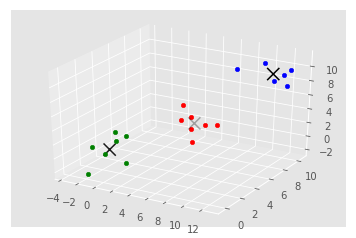

In [7]:
colors = 10*['r','g','b','c','k','y','m']
fig = plt.figure()
ax = fig.add_subplot(111 , projection = '3d')

for i in range(len(X)):
    ax.scatter(X[i][0],X[i][1],X[i][2],c = colors[labels[i]] , marker = 'o')
ax.scatter(cluster_centers[:,0],cluster_centers[:,1],cluster_centers[:,2],marker = 'x',
           color = 'k', s = 150, linewidths = 5, zorder = 10)
plt.show()

In [8]:
import numpy as np
from sklearn.cluster import MeanShift , KMeans
from sklearn import preprocessing, cross_validation
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('titanic.xls')
original_df = pd.DataFrame.copy(df)
df.drop(['body','name'],1,inplace = True)
df.fillna(0,inplace = True)

def handle_non_numerical_data(df):
    
    columns = df.columns.values
    text_digit_vals = {}
    x = 0
    def convert_to_int(val):
        return text_digit_vals[val]
    
    for column in columns:
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1
            df[column] = list(map(convert_to_int,df[column]))
    return df

df = handle_non_numerical_data(df)
df.drop(['ticket','home.dest'],1,inplace = True)

X = np.array(df.drop(['survived'],1).astype(float))
X = preprocessing.scale(X)
Y = np.array(df['survived'])

clf = MeanShift()
clf.fit(X)

c:\users\deepika\appdata\local\programs\python\python35\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=1, seeds=None)

In [11]:
labels = clf.labels_

In [14]:
X


array([[-1.54609786, -1.34499549,  0.29131302, ...,  2.97057057,
         0.09234877,  1.23472473],
       [-1.54609786,  0.74349692, -1.30576934, ..., -0.1519036 ,
         0.09234877,  1.43283349],
       [-1.54609786, -1.34499549, -1.24416265, ..., -0.1519036 ,
         0.09234877, -0.74636286],
       ...,
       [ 0.84191642,  0.74349692,  0.14913935, ..., -0.43979129,
        -0.04286884, -0.74636286],
       [ 0.84191642,  0.74349692,  0.17757408, ..., -0.43979129,
        -0.04286884, -0.74636286],
       [ 0.84191642,  0.74349692,  0.29131302, ..., -0.43979129,
         0.09234877, -0.74636286]])

In [13]:
clf.cluster_centers_

array([[ 3.60651765e-01,  2.08220657e-01, -1.40512910e-01,
        -2.37152322e-01, -2.90560250e-01, -3.57869929e-01,
        -3.95112789e-01,  4.00685779e-02, -2.03725075e-01],
       [ 8.41916418e-01, -6.48831357e-01,  6.17364645e-01,
         1.61162928e-01,  4.71740676e+00, -2.67597636e-02,
        -4.39791290e-01,  6.53052480e-02, -4.72486191e-01],
       [-1.54609786e+00, -3.00749289e-01,  1.95474500e+00,
         4.81287772e-01,  3.60016958e+00,  4.43513362e+00,
         6.78541659e-01,  2.47399666e-02,  3.19775066e-01],
       [-1.54609786e+00,  4.73327793e-02,  1.08748559e+00,
        -4.79086761e-01,  3.25508895e-01,  9.26124543e+00,
         2.68268288e+00, -4.28688357e-02,  1.39112638e+00],
       [ 8.41916418e-01, -3.00749289e-01, -1.35790158e+00,
         4.81287772e-01,  9.95686385e+00,  7.01369710e-01,
        -4.39791290e-01,  9.23487689e-02, -7.46362861e-01],
       [-1.54609786e+00, -1.34499549e+00,  1.48557187e+00,
        -4.79086761e-01, -4.44999502e-01,  9.033907

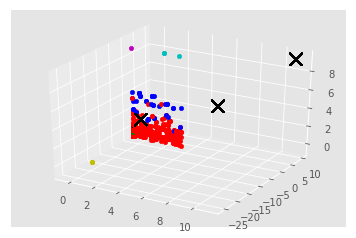

In [21]:
colors = 10*['r','g','b','c','k','y','m']
fig = plt.figure()
ax = fig.add_subplot(111 , projection = '3d')

for i in range(len(X)):
    ax.scatter(X[i][6],X[i][7],X[i][5],c = colors[labels[i]] , marker = 'o')
    ax.scatter(cluster_centers[:,0],cluster_centers[:,1],cluster_centers[:,2],marker = 'x',
           color = 'k', s = 150, linewidths = 5, zorder = 10)
plt.show()